In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = pd.read_csv('c:\data\diabetes.csv')
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


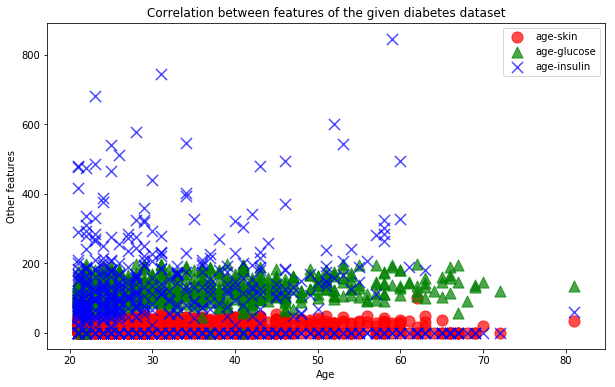

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(dataset['Age'], dataset['SkinThickness'], marker = 'o', color= 'r', alpha= 0.7, s= 124, label= "age-skin")
plt.scatter(dataset['Age'], dataset['Glucose'], marker = '^', color= 'g', alpha= 0.7, s= 124, label= "age-glucose")
plt.scatter(dataset['Age'], dataset['Insulin'], marker = 'x', color= 'b', alpha= 0.7, s= 124, label= "age-insulin")

plt.title('Correlation between features of the given diabetes dataset')

plt.xlabel('Age')
plt.ylabel('Other features')

plt.legend(loc='upper right')

plt.show()

In [5]:
#save the Outcome in a separate place and drop it from the dataset
label = dataset['Outcome']
dataset = dataset.drop('Outcome', axis= 1)

In [6]:
#split the dataset into training data and test data
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1, random_state=42)

In [7]:
#make the classifier and apply it to the training data 
clf = RandomForestClassifier(n_estimators=1000, n_jobs= -1)
t0= time()
clf.fit(x_train, y_train)
"training time:", round(time()-t0, 3), "s"

clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
#now use the classifier to predict the outcome in test data
t1= time()
pred = clf.predict(x_test)
"prediction time:", round(time()-t1, 3), "s"

('prediction time:', 0.426, 's')

In [9]:
accuracy = clf.score(x_test, y_test)
accuracy

0.7012987012987013